In [33]:
# Downloading the dataset from kaggle
import kagglehub

path = kagglehub.dataset_download("saurabh00007/diabetescsv")


In [42]:
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn import metrics
import seaborn as sn


In [35]:
# Importing the dataset
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
data = pd.read_csv(f"{path}/diabetes.csv", skiprows=1, names=col_names)
data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [37]:
feature_cols = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
x = data[feature_cols]
y = data.label

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=5)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [38]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

In [39]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusiong Matrix: ", confusion_matrix)
acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy percentage: ", acc_score*100, "%")



Confusiong Matrix:  [[88 12]
 [19 35]]
Accuracy percentage:  79.87012987012987 %


<Axes: xlabel='Predicted', ylabel='Actual'>

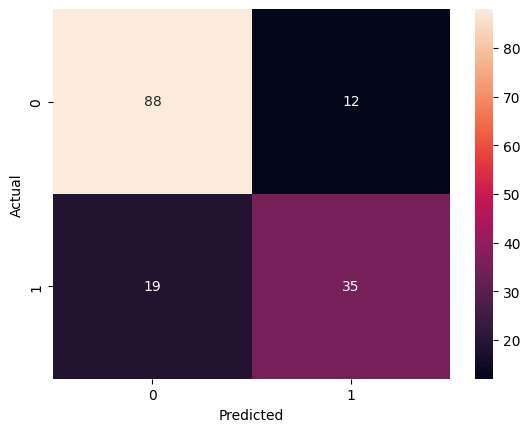

In [44]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)